In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving scores_data.csv to scores_data.csv


In [4]:
df = pd.read_csv("scores_data.csv")
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [5]:
df.shape

(149, 3)

In [6]:
df.info

<bound method DataFrame.info of          Batch  User_ID     Score   
0    AI_ELITE_7  uid_149       6 / 7
1    AI_ELITE_7  uid_148       6 / 7
2    AI_ELITE_7  uid_147       7 / 7
3    AI_ELITE_7  uid_146       7 / 7
4    AI_ELITE_7  uid_145       4 / 7
..          ...      ...         ...
144  AI_ELITE_4    uid_5       4 / 7
145  AI_ELITE_4    uid_4       4 / 7
146  AI_ELITE_4    uid_3       4 / 7
147  AI_ELITE_4    uid_2       3 / 7
148  AI_ELITE_4    uid_1       2 / 7

[149 rows x 3 columns]>

In [7]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [8]:
df.columns = df.columns.str.strip()
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [9]:
def clean_score(val):
    val = str(val).strip()

    # if '6 / 7' or '0 / 7'
    if "/" in val:
        return int(val.split("/")[0].strip())

    # if '06-Jul', '07-Jul'
    if "-" in val:
        return int(val.split("-")[0])

    return None

df["Score"] = df["Score"].apply(clean_score)
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6
1,AI_ELITE_7,uid_148,6
2,AI_ELITE_7,uid_147,7
3,AI_ELITE_7,uid_146,7
4,AI_ELITE_7,uid_145,4


In [10]:
df.isnull().sum()

,0
Batch,0
User_ID,0
Score,0


## Univariate Analysis

### Non visual

In [11]:
df["Score"].describe()

,Score
count,149.000000
mean,4.382550
std,1.592199
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,7.000000


### Visual

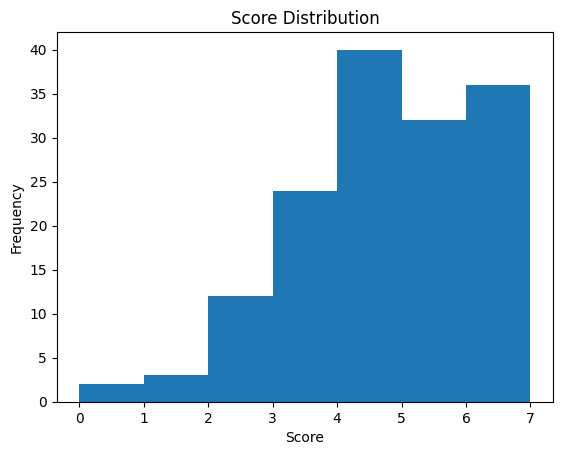

In [12]:
import matplotlib.pyplot as plt

plt.hist(df["Score"], bins=7)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Score Distribution")
plt.show()

<Axes: xlabel='Score', ylabel='Count'>

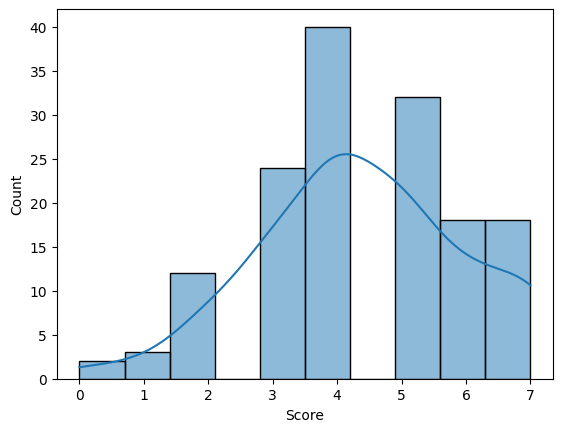

In [13]:
sns.histplot(df['Score'], kde=True)

In [14]:
print('Number of rows: ', df.shape[0])
print('Score Mean: ', df['Score'].mean())

Number of rows:  149
Score Mean:  4.382550335570469


## Bivariate Analysis

In [15]:
df.groupby("Batch")["Score"].mean()

,Score
Batch,
AI_ELITE_4,3.791667
AI_ELITE_6,4.229167
AI_ELITE_7,5.056604


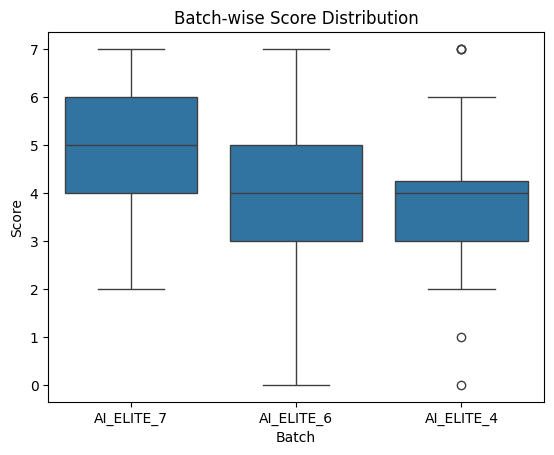

In [16]:
import seaborn as sns

sns.boxplot(x="Batch", y="Score", data=df)
plt.title("Batch-wise Score Distribution")
plt.show()

## Batch wise summary

In [17]:
batch_summary = df.groupby("Batch")["Score"].agg(
    Students="count",
    Avg_Score="mean",
    Min_Score="min",
    Max_Score="max"
)

batch_summary

,Students,Avg_Score,Min_Score,Max_Score
Batch,,,,
AI_ELITE_4,48,3.791667,0,7
AI_ELITE_6,48,4.229167,0,7
AI_ELITE_7,53,5.056604,2,7


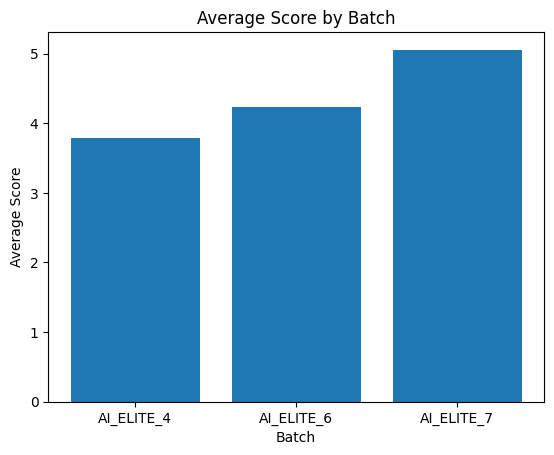

In [18]:
plt.bar(batch_summary.index, batch_summary["Avg_Score"])
plt.xlabel("Batch")
plt.ylabel("Average Score")
plt.title("Average Score by Batch")
plt.show()

## Statistics

Central Tendency

In [19]:
df["Score"].mean()

np.float64(4.382550335570469)

In [20]:
df["Score"].median()

4.0

In [21]:
df["Score"].mode()

,Score
0,4


In [22]:
df["Score"].mean(), df["Score"].median(), df["Score"].mode()

(np.float64(4.382550335570469),
 4.0,
 0    4
 Name: Score, dtype: int64)

Dispersion

In [23]:
df["Score"].std()

1.5921993773540153

In [24]:
df["Score"].var()

2.5350988572465143

In [25]:
df["Score"].var(), df["Score"].std()


(2.5350988572465143, 1.5921993773540153)

## Distribution and Imbalance

In [26]:
df["Score"].value_counts().sort_index()

,count
Score,
0,2
1,3
2,12
3,24
4,40
5,32
6,18
7,18


In [27]:
df["Score"].value_counts(normalize=True)

,proportion
Score,
4,0.268456
5,0.214765
3,0.161074
7,0.120805
6,0.120805
2,0.080537
1,0.020134
0,0.013423


## Sampling Random

In [28]:
sample_df = df.sample(frac=0.3, random_state=42)
sample_df

,Batch,User_ID,Score
73,AI_ELITE_6,uid_76,5
18,AI_ELITE_7,uid_131,5
117,AI_ELITE_4,uid_32,4
78,AI_ELITE_6,uid_71,7
76,AI_ELITE_6,uid_73,3
31,AI_ELITE_7,uid_118,5
64,AI_ELITE_6,uid_85,5
140,AI_ELITE_4,uid_9,4
68,AI_ELITE_6,uid_81,0
82,AI_ELITE_6,uid_67,5


<Axes: xlabel='Score', ylabel='Count'>

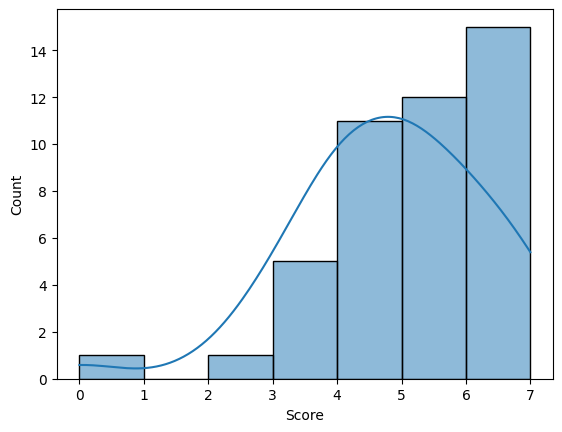

In [29]:
sns.histplot(sample_df['Score'], kde=True)

In [30]:
print("Sample Mean (i.e. Statistics):", sample_df['Score'].mean())

Sample Mean (i.e. Statistics): 4.822222222222222


In [31]:
sample_df.shape

(45, 3)

In [32]:
print("Score Mean (i.e. Parameter):", df['Score'].mean())
print("Sample Mean (i.e. Statistics):", sample_df['Score'].mean())

print()
print("R E S U L T")
print(f"Score mean is estimated to be approximately equal to {sample_df['Score'].mean()}.")

Score Mean (i.e. Parameter): 4.382550335570469
Sample Mean (i.e. Statistics): 4.822222222222222

R E S U L T
Score mean is estimated to be approximately equal to 4.822222222222222.


## Deviation

In [33]:
df["Deviation"] = df["Score"] - df["Score"].mean()
df[["Score","Deviation"]] , df.head()

(     Score  Deviation
 0        6    1.61745
 1        6    1.61745
 2        7    2.61745
 3        7    2.61745
 4        4   -0.38255
 ..     ...        ...
 144      4   -0.38255
 145      4   -0.38255
 146      4   -0.38255
 147      3   -1.38255
 148      2   -2.38255
 
 [149 rows x 2 columns],
         Batch  User_ID  Score  Deviation
 0  AI_ELITE_7  uid_149      6    1.61745
 1  AI_ELITE_7  uid_148      6    1.61745
 2  AI_ELITE_7  uid_147      7    2.61745
 3  AI_ELITE_7  uid_146      7    2.61745
 4  AI_ELITE_7  uid_145      4   -0.38255)

## Summary
batch 7 best performing

batch 6 mid performing

batch 4 low performing